In [1]:
import torch
from torch import nn, optim

from src.data.sine import get_sine_dataloaders
from src.models.transformer import CustomTransformer
from src.training.helicopter import train_helicopter

train_data, valid_data = get_sine_dataloaders(batch_size=24, shuffle=True)

model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

train_helicopter(
    train_data=train_data, 
    valid_data=valid_data, 
    model=model, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    mask_strategy="random zero",
    loss_strategy="complete",
    random_mask_prop=0.3, 
    noise_variance=0.001,
    epochs=20, 
    device="cuda")


c:\Users\maxho\anaconda3\envs\transformer-anomaly-detection\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1:


Validating ...: 100%|██████████| 167/167 [00:17<00:00,  9.35it/s]


Epoch 1/20, Train loss: 0.005160660727818807, Valid loss: 0.0023538439245894553
Epoch 2:


Validating ...: 100%|██████████| 167/167 [00:17<00:00,  9.37it/s]


Epoch 2/20, Train loss: 0.002312438101756076, Valid loss: 0.0022341899303719402
Epoch 3:


Validating ...: 100%|██████████| 167/167 [00:17<00:00,  9.35it/s]


Epoch 3/20, Train loss: 0.002222207401879132, Valid loss: 0.001986881663557142
Epoch 4:


Validating ...: 100%|██████████| 167/167 [00:17<00:00,  9.38it/s]


Epoch 4/20, Train loss: 0.0017908868066345651, Valid loss: 0.0010760862417519093
Epoch 5:


Validating ...: 100%|██████████| 167/167 [00:17<00:00,  9.41it/s]


Epoch 5/20, Train loss: 0.0005093943056960901, Valid loss: 0.0005014406684786081
Epoch 6:


Training ...:   4%|▎         | 45/1250 [00:14<06:38,  3.03it/s]


KeyboardInterrupt: 

In [2]:
torch.save(model, "model-sine-zero-mask-complete-good.save")

In [3]:
# import torch
# from torch import nn
# from src.data.helicopter import get_helicopter_dataloaders
# from src.models.transformer import CustomTransformer
from src.plotting import plot_attention_weights

# train_data, valid_data = get_helicopter_dataloaders(batch_size=24, shuffle=True, device="cuda")


for batch in valid_data:
    batch = batch.to("cuda")
    break

mask = (torch.FloatTensor(batch.shape).uniform_() > 0.3).to("cuda")

# model = torch.load("model.save")
# model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

pred_batch, layer_attn_weights = model(batch*mask)

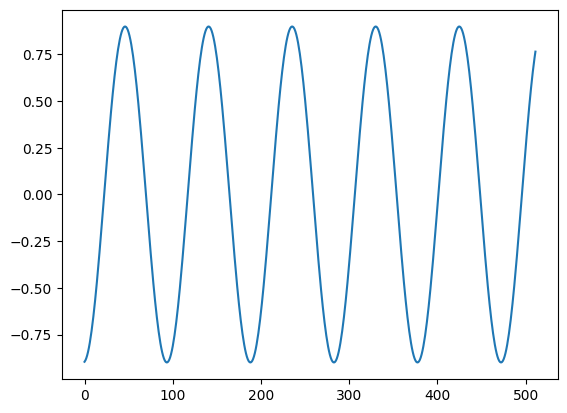

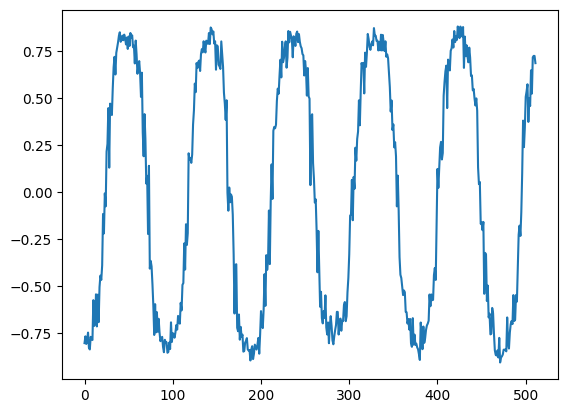

In [7]:
import matplotlib.pyplot as plt

idx = 3

plt.plot((batch).cpu().detach()[idx])
plt.show()
plt.plot((pred_batch).cpu().detach()[idx])
plt.show()

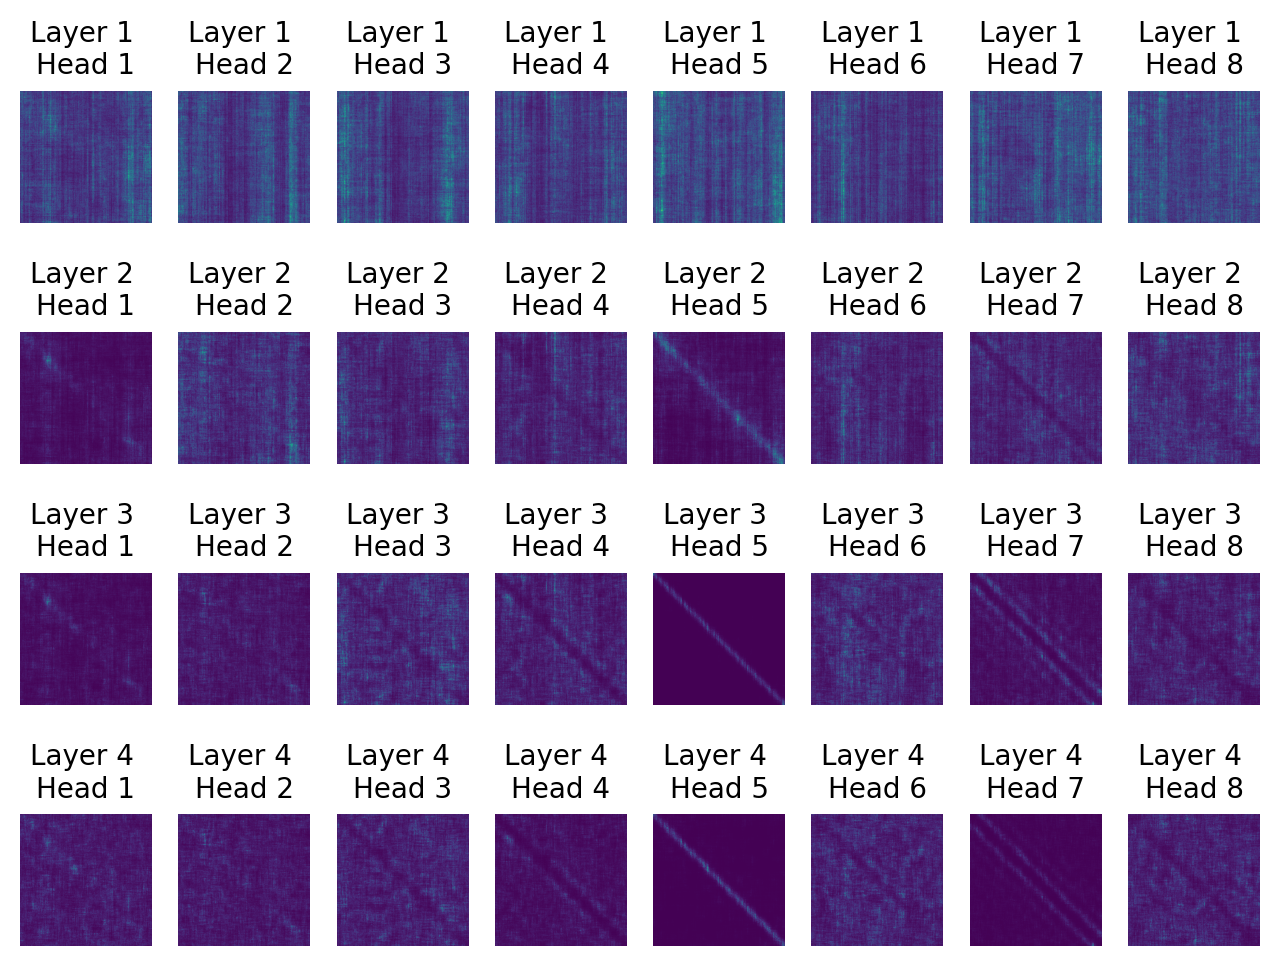

In [8]:
plot_attention_weights(layer_attn_weights.cpu().detach().numpy(), 2)